In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
faces_all = fetch_olivetti_faces()
K = 7 # 7번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]
X3 = faces_all.data[faces_all.target == K]
print(faces.shape)
print(X3.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\user\scikit_learn_data
(10, 64, 64)
(10, 4096)


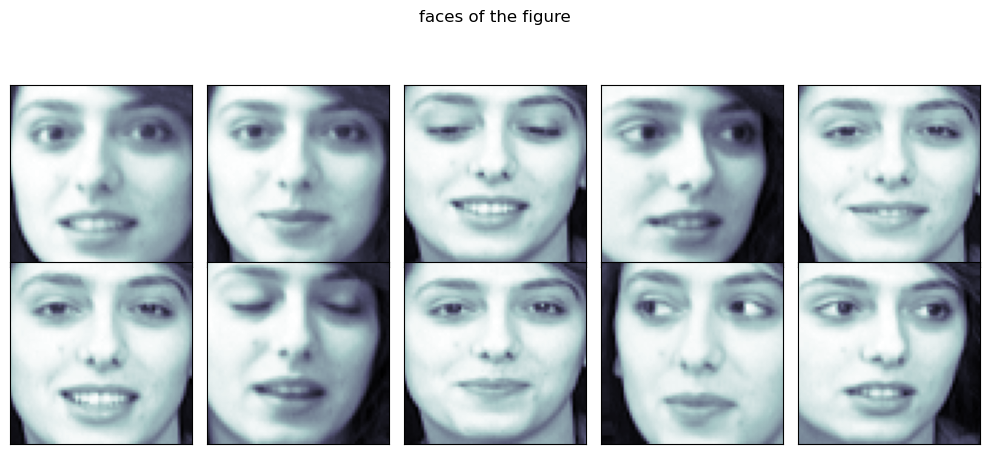

In [2]:
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N) :
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("faces of the figure")
plt.tight_layout()
plt.show()

In [3]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)
print(W3.shape)
print(X32.shape)

(10, 2)
(10, 4096)


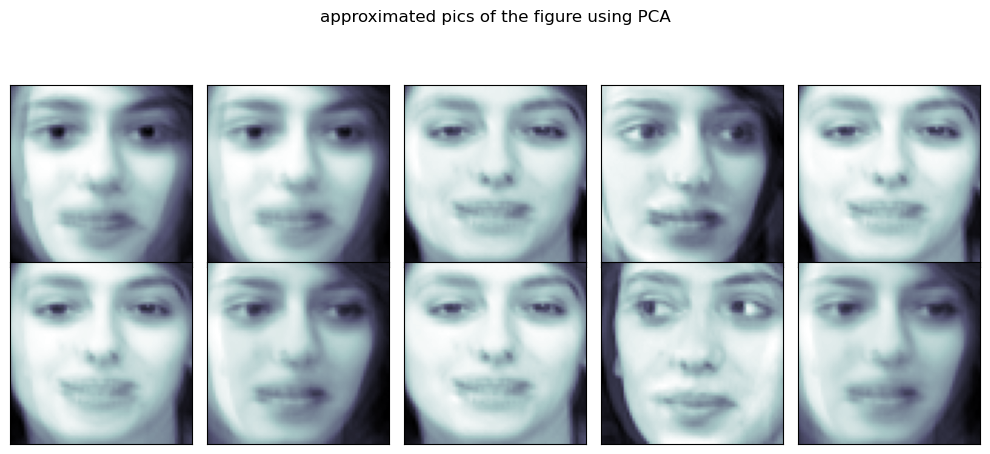

In [5]:
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks(())
plt.suptitle("approximated pics of the figure using PCA")
plt.tight_layout()
plt.show()

In [7]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

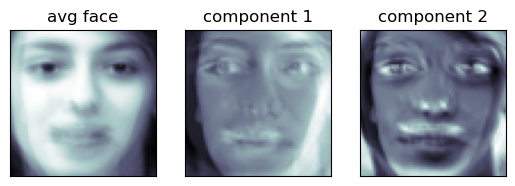

In [8]:
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("avg face")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("component 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("component 2")
plt.show()

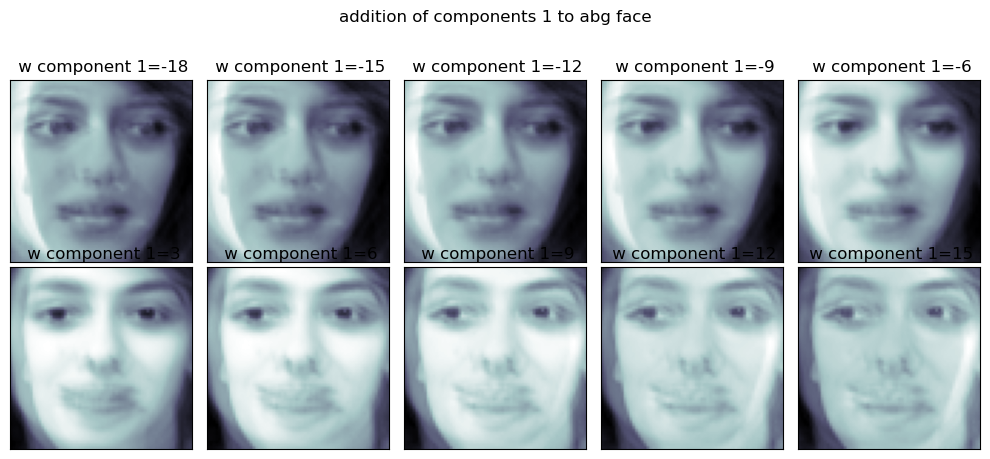

In [11]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 3 * (k - 6) if k < 5 else 3 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(" w component 1={}".format(w))
plt.suptitle("addition of components 1 to abg face")
plt.tight_layout()
plt.show()

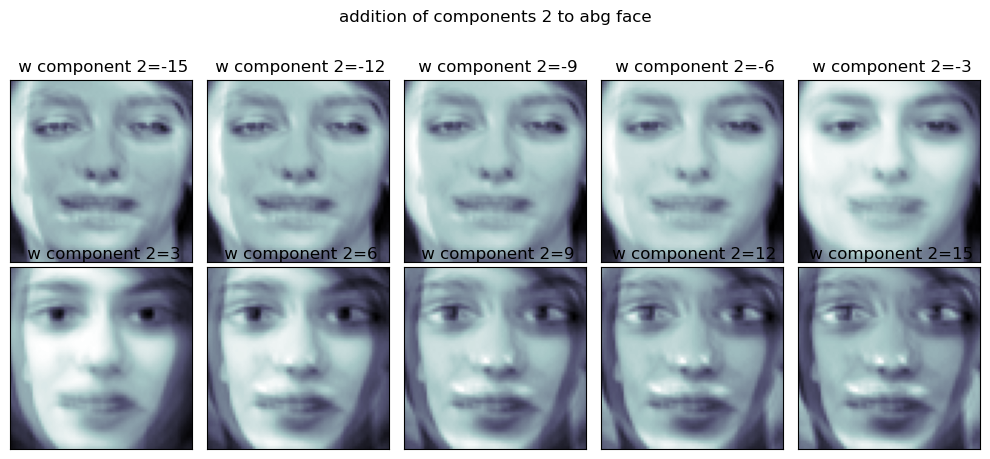

In [12]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 3 * (k - 5) if k < 5 else 3 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(" w component 2={}".format(w))
plt.suptitle("addition of components 2 to abg face")
plt.tight_layout()
plt.show()

In [19]:
# new wine data 불러오기
import pandas as pd

dat_wine = pd.read_csv('./wine_new.csv', header=None)

from sklearn.model_selection import train_test_split
X, y = dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [20]:
dat_wine.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [21]:
# 고유값, 고유벡터 구하기
import numpy as np
scov = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(scov)
print('Eigenvalues \n%s' %eigen_vals)

Eigenvalues 
[4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]


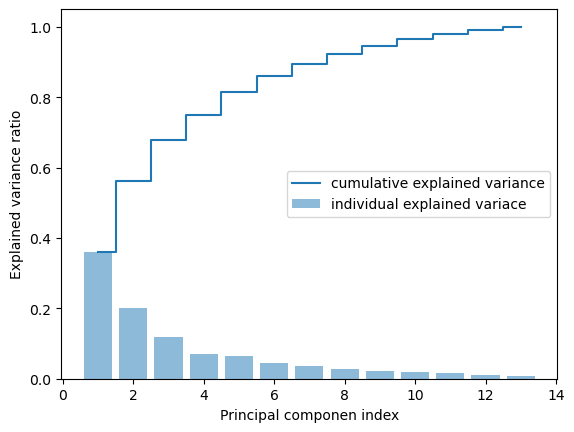

In [22]:
# Explained variance ratio
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variace')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal componen index')
plt.legend(loc='best')
plt.show()

In [23]:
# PCA를 통해 차원 축소 후 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
lr = LogisticRegression()
lpca = PCA(n_components=4)
X_train_pca = lpca.fit_transform(X_train_std)
X_test_pca = lpca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
y_train_pre = lr.predict(X_train_pca)
y_test_pre = lr.predict (X_test_pca)

from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pre))
print(metrics.accuracy_score(y_test, y_test_pre))
print(metrics.confusion_matrix(y_test, y_test_pre))

0.9758064516129032
0.9629629629629629
[[18  0  0]
 [ 2 19  0]
 [ 0  0 15]]


In [24]:
print(lpca.components_)
print(lpca.explained_variance_)

[[ 0.14119433 -0.24946815  0.05104853 -0.19890851  0.1444494   0.40472564
   0.42654202 -0.29573373  0.32620144 -0.07420694  0.29277478  0.37482201
   0.2889145 ]
 [-0.46732089 -0.26876924 -0.27660192  0.01955098 -0.32120489 -0.04839313
   0.00936768 -0.00146817 -0.04087554 -0.53982087  0.27536907  0.19149315
  -0.34828709]
 [-0.18497972  0.11558438  0.62580603  0.63022498  0.06808315  0.14454263
   0.16109721  0.20830498  0.10392829 -0.07463025  0.04770525  0.16694498
  -0.14905602]
 [-0.06135175  0.50736306 -0.23358668  0.06619111 -0.21808618  0.10100723
   0.07511595 -0.33032862  0.45117801 -0.01323281 -0.46488038  0.19553794
  -0.22195876]]
[4.7095539  2.63606471 1.55728758 0.93422662]
